### 전산응용 12주차 과제
### 16101777 심용우

$$
(m_1+m_2) l_1\theta_1'' + m_2l_2\theta_2''\cos(\theta_1-\theta_2)
+ m_2l_2(\theta_2')^2\sin(\theta_1-\theta_2)+g(m_1+m_2)\sin(\theta_1) = 0
$$

$$
m_2l_2\theta_2'' + m_2l_1\theta_1''\cos(\theta_1-\theta_2) - m_2l_1 (\theta_1')^2 \sin(\theta_1-\theta_2)
+m_2g\sin(\theta_2) = 0
$$

In [1]:
#필요한 모듈들 import 하기
import numpy as np
import sympy
import scipy
from scipy import integrate
sympy.init_printing()
import matplotlib.pyplot as plt
#사용할 문자들 정의하기
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)

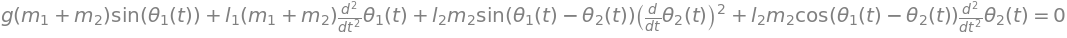

In [2]:
#첫번째 미분방정식 ODE1
ode1 = sympy.Eq((m1 + m2)*l1*theta1(t).diff(t,t) +\
                m2*l2*theta2(t).diff(t,t)*sympy.cos(theta1(t) -theta2(t)) +\
                m2*l2*theta2(t).diff(t)**2*sympy.sin(theta1(t) - theta2(t)) + \
                g*(m1 + m2)*sympy.sin(theta1(t)),0)
ode1

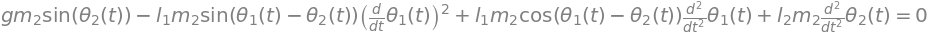

In [3]:
#두번째 미분방정식 ODE2
ode2 = sympy.Eq(m2*l2*theta2(t).diff(t,t) +\
                m2*l1*theta1(t).diff(t,t)*sympy.cos(theta1(t) - theta2(t)) -\
                m2*l1*theta1(t).diff(t)**2*sympy.sin(theta1(t) - theta2(t)) +\
                m2*g*sympy.sin(theta2(t)),0)
ode2

### 치환
$$ y_1(t)=\theta _1(t) \quad y_2(t)=\theta _1'(t) \quad y_3(t)=\theta _2(t) \quad y_4(t)=\theta _2'(t) $$


In [4]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)

varchange = {theta1(t).diff(t, t): y2(t).diff(t), 
             theta1(t): y1(t),
             theta2(t).diff(t, t): y4(t).diff(t), 
             theta2(t): y3(t)}

#기존 ODE에 y(t)들을 대입하기
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)

# 관계식 ODE3,ODE4 (y_1과 y_2의 관계, y_3와 y_4의 관계)
ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)

In [5]:
#연립미분방정식을 행렬로 표현
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])

#연립미분방정식 풀기
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])

In [6]:
#Jacobian
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f]) ; jac


⎡                                                                             
⎢                                                                             
⎢                                                        ⎛                    
⎢                                                        ⎜                  g⋅
⎢                                                   2⋅m₂⋅⎜g⋅m₁⋅sin(y₁(t)) + ──
⎢                                                        ⎝                    
⎢                                                   ──────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [7]:
#무게와 길이 설정, m1=m2=1kg, l1=l2=1m, g=9.8m/s^2
params = {m1: 1.0, l1: 1.0, m2: 1.0, l2: 1.0, g: 9.8}

f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')
jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')

In [8]:
y0 = [2.0, 0, 0.0, 0]

#1000개의 데이터 수치값
t = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, t[0])

In [9]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

In [10]:
theta1_np, theta2_np = y[:, 0], y[:, 2]

x1 =  params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

### 에니메이션으로 나타내기

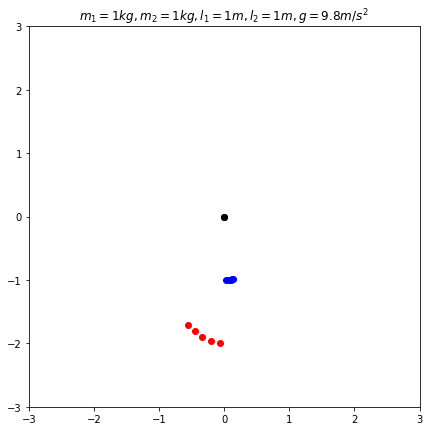

In [37]:
#에니메이션 모듈 가져오기
from matplotlib import animation, rc


fig, ax = plt.subplots(figsize=(7,7))

xdata1, ydata1 = [],[]
xdata2, ydata2 = [],[]
line1, = plt.plot([],[],'bo') #lw=2
line2, = plt.plot([],[],'ro')

plt.title("$m_1=1kg, m_2=1kg, l_1=1m, l_2=1m, g=9.8m/s^2$")

def init():
    ax.set_xlim(( -3, 3))
    ax.set_ylim((-3, 3))
    plt.plot([0],[0],'ko')
    return line1, line2,

def animate(i):
    xdata1.append(x1[int(i)])
    ydata1.append(y1[int(i)])
    if i>=5:
        xdata1.remove(x1[int(i)-5])
        ydata1.remove(y1[int(i)-5])
    xdata2.append(x2[int(i)])
    ydata2.append(y2[int(i)])
    if i>=5:
        xdata2.remove(x2[int(i)-5])
        ydata2.remove(y2[int(i)-5])
    line1.set_data(xdata1,ydata1)
    line2.set_data(xdata2,ydata2)
    return line1, line2,

#1000개의 데이터를 20ms(0.02초)간격으로 재생 = 1000x0.02=20초
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

rc('animation', html='html5')
anim

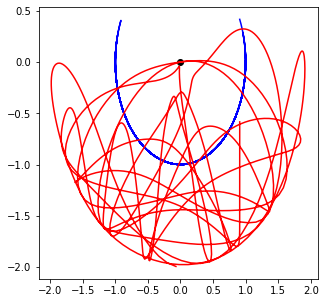

In [35]:
fig = plt.figure(figsize=(5,5))
plt.plot([0],[0],'ko')
plt.plot(x1,y1,color='b')
plt.plot(x2,y2,color='r')